In [34]:
import numpy as np
import pandas as pd
import gc
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import xgboost

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import pickle


In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/valkyrie/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
columns=["sentiment", "ids", "date", "flag", "user", "text"]
data=pd.read_csv('../Dataset/raw/data.csv',names=columns,encoding='ISO-8859-1')

In [3]:
data=data[["text","sentiment"]]
data.head()

,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [26]:
gc.collect()

4070

In [5]:
data.loc[data['sentiment']==4,'sentiment']=1

In [6]:
data.sentiment.value_counts()

1    800000
0    800000
Name: sentiment, dtype: int64

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

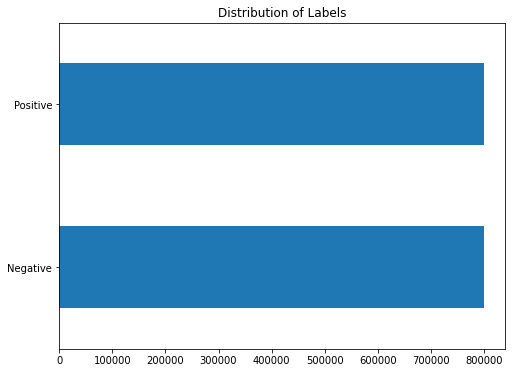

In [7]:
ax=data.sentiment.value_counts().plot(kind='barh',figsize=(8,6),title="Distribution of Labels")
ax.set_yticklabels(['Negative','Positive'], rotation=0)


In [11]:
#Converting Tweets to LowerCase
data["text"]=data.text.str.lower()

#Replacing Links with "URL"
data["text"]=data["text"].str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "URL")

#Removing the Usernames
data["text"]=data["text"].str.replace(r'@[^\s]+',"")

#Removing all Non Alpha Numeric Characters
data["text"]=data["text"].str.replace(r'[^A-Za-z0-9 ]+',"")

#Removng Stopwords
stop_words = stopwords.words('english') 
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


#Lementize
wordlem = WordNetLemmatizer()
data['text']=data['text'].apply(lambda x: ' '.join([wordlem.lemmatize(word) for word in x.split()]))



# df[''] = df['Links'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])


In [12]:
data.head()

,text,sentiment
0,url awww thats bummer shoulda got david carr t...,0
1,upset cant update facebook texting might cry r...,0
2,dived many time ball managed save 50 rest go b...,0
3,whole body feel itchy like fire,0
4,behaving im mad cant see,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'],test_size = 0.10, random_state = 0)

In [14]:
X_train.shape,X_test.shape

((1440000,), (160000,))

In [15]:
#Vectorsing the Tweets
vectorizer=TfidfVectorizer(max_df=0.9,min_df=20,max_features=10000,ngram_range=(1,3))
vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=10000,
                min_df=20, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [16]:
print ("Vocab Size:",len(vectorizer.get_feature_names()))

Vocab Size: 10000


In [17]:
# Applyting TF-ID
X_train=vectorizer.transform(X_train)
X_test=vectorizer.transform(X_test)

In [18]:
X_train.shape

(1440000, 10000)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.0s finished
Training....
Acc:  0.7853875
F1 Score:  0.7906474820143885


Text(0.5, 1.05, 'Confussion Matrix')

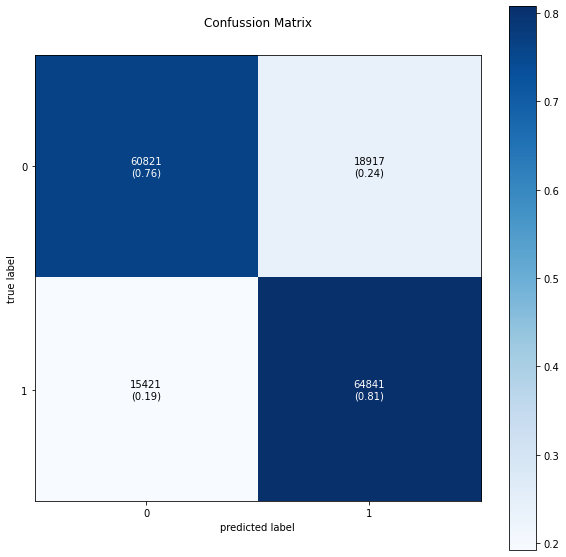

In [19]:
#Training Logitistic Regression
lr=LogisticRegression(verbose=3,max_iter=100)
lr.fit(X_train,y_train)
print ('Training....')

pred=lr.predict(X_test)
acc=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred)
confussion=confusion_matrix(y_test,pred,labels=[0,1])
print ("Acc: ",acc)
print ("F1 Score: ",f1)


fig, ax = plot_confusion_matrix(conf_mat=confussion,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               figsize=(10,10))
plt.title('Confussion Matrix')

Acc:  0.7689375
F1 Score:  0.7755285431517079


Text(0.5, 1.05, 'Confussion Matrix')

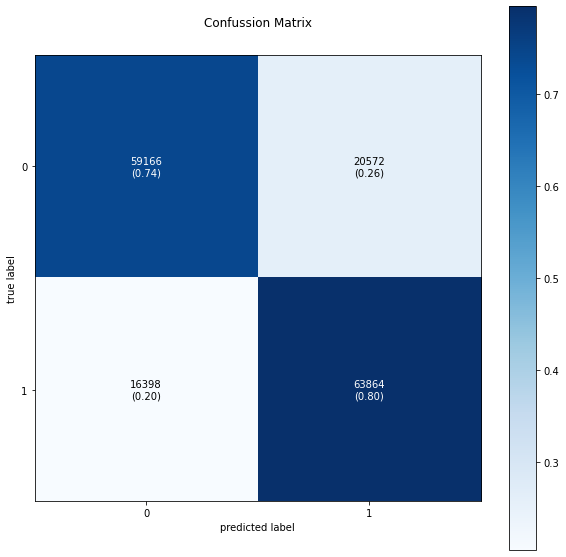

In [21]:
# BNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
pred=bnb.predict(X_test)
acc=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred)
confussion=confusion_matrix(y_test,pred,labels=[0,1])

print ("Acc: ",acc)
print ("F1 Score: ",f1)

fig, ax = plot_confusion_matrix(conf_mat=confussion,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               figsize=(10,10))
plt.title('Confussion Matrix')

Acc:  0.7840125
F1 Score:  0.7901811734991256


Text(0.5, 1.05, 'Confussion Matrix')

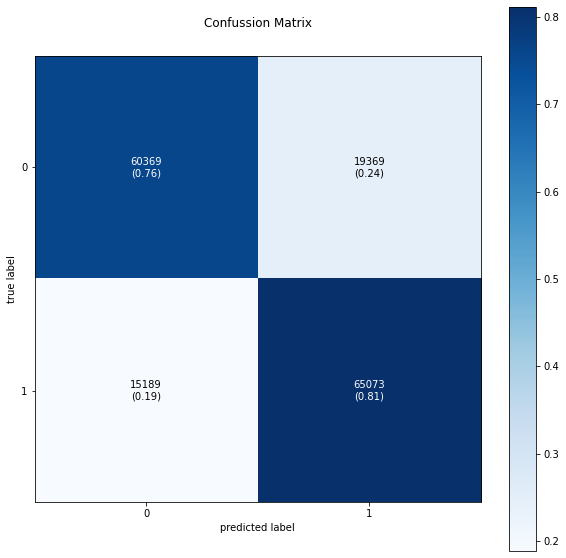

In [22]:
# SVC
svc = LinearSVC()
svc.fit(X_train, y_train)
pred=svc.predict(X_test)
acc=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred)
confussion=confusion_matrix(y_test,pred,labels=[0,1])

print ("Acc: ",acc)
print ("F1 Score: ",f1)

fig, ax = plot_confusion_matrix(conf_mat=confussion,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               figsize=(10,10))
plt.title('Confussion Matrix')

Acc:  0.76734375
F1 Score:  0.7669986167009883


Text(0.5, 1.05, 'Confussion Matrix')

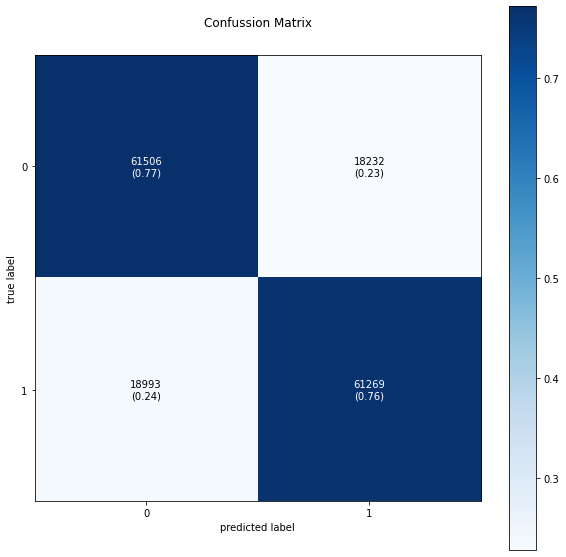

In [23]:
# SVC
nb = MultinomialNB()
nb.fit(X_train, y_train)
pred=nb.predict(X_test)
acc=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred)
confussion=confusion_matrix(y_test,pred,labels=[0,1])

print ("Acc: ",acc)
print ("F1 Score: ",f1)

fig, ax = plot_confusion_matrix(conf_mat=confussion,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               figsize=(10,10))
plt.title('Confussion Matrix')

Acc:  0.6548
F1 Score:  0.7206243866908113


Text(0.5, 1.05, 'Confussion Matrix')

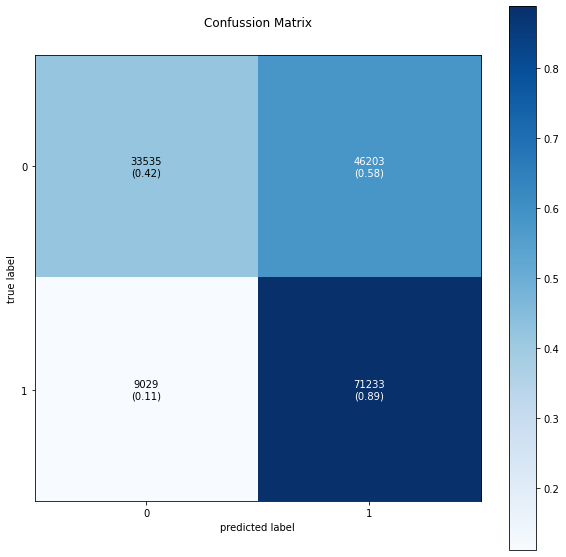

In [29]:
params={'eta': 0.1,
 'objective':'binary:logistic',
 'max_depth': 6,
 'n_estimators': 20,
 'early_stopping_rounds': 10,
 'n_jobs': -1,
 'verbose': 1
 }

# xg_train=xgboost.DMatrix(X_train,label=Y_train)
# model=xgboost.XGBClassifier()train(params,xg_train,50)

xg=xgboost.XGBClassifier(**params)
xg.fit(X_train,y_train)

pred=xg.predict(X_test)
acc=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred)
confussion=confusion_matrix(y_test,pred,labels=[0,1])

print ("Acc: ",acc)
print ("F1 Score: ",f1)

fig, ax = plot_confusion_matrix(conf_mat=confussion,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               figsize=(10,10))
plt.title('Confussion Matrix')

In [30]:
def preprocess(tweet):
    #LowerCase 
    tweet=tweet.lower()

    #Replacing URL
    tweet=tweet.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "URL")

    #Removing Username
    tweet=tweet.replace(r'@[^\s]+',"")

    #Removing Non-Alpha Numeric Chars
    tweet=tweet.replace(r'[^A-Za-z0-9 ]+',"")


    stop_words = stopwords.words('english') 
    text_tokens = word_tokenize(tweet)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    

    #Lementize
    wordlem = WordNetLemmatizer()
    tokens_without_sw=[wordlem.lemmatize(word) for word in tokens_without_sw]
    filtered_sentence = (" ").join(tokens_without_sw)



    return filtered_sentence

In [32]:
#Testing 
tweet="I am sad"
tweet=preprocess(tweet)
tweet=vectorizer.transform([tweet])
lr.predict(tweet)

array([0])

In [36]:
file = open('tfidf-ngram-(1,3).pickle','wb')
pickle.dump(vectorizer, file)
file.close()

file = open('lr.pickle','wb')
pickle.dump(lr, file)
file.close()

file = open('svc.pickle','wb')
pickle.dump(svc, file)
file.close()

In [42]:
def load_models():
    # Load the vectoriser.
    file = open('tfidf-ngram-(1,3).pickle', 'rb')
    vectorizer = pickle.load(file)
    file.close()
    
    # Load the LR Model.
    file = open('lr.pickle', 'rb')
    lr = pickle.load(file)
    file.close()
    
    return vectorizer, lr



def predict(vectorizer,model,tweets):

    preproc=[]
    for tweet in tweets:
        preproc.append(preprocess(tweet))

    vect=vectorizer.transform(preproc)
    sent=model.predict(vect)

    data = []
    for text, pred in zip(tweets, sent):
        data.append((text,pred))

    df=pd.DataFrame(data,columns=["Tweets","Sentiment"])
    df = df.replace([0,1], ["Negative","Positive"])

    return df



In [43]:
vect,model=load_models()
tdf=predict(vect,model,["I am happy","I am sad"])

In [44]:
tdf

,Tweets,Sentiment
0,I am happy,Positive
1,I am sad,Negative


In [50]:
from textblob import TextBlob
testimonial = TextBlob("this notebook helps you to understand. It is so good")
testimonial.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(X_test[0])
vs

TypeError: unhashable type: 'csr_matrix'

<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>